### Homework 4

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold


from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.linear_model import Ridge
from sklearn import metrics

In [70]:
data_url='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'
data=pd.read_csv(data_url)

In [71]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


**Preparation**

Create the target variable by mapping yes to 1 and no to 0.


In [72]:
data['card']=(data['card']=='yes').astype(int)

Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.


In [73]:
data_full_train,data_test=train_test_split(data,test_size=0.2,random_state=1)

data_train,data_val=train_test_split(data_full_train,test_size=0.25,random_state=1)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int32  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int32(1), int64(5), object(2)
memory usage: 118.6+ KB


In [75]:
y_train=data_train.card.values
y_test=data_test.card.values


In [76]:
y_val=data_val.card.values

In [77]:
del data_test['card']

In [78]:
del data_train['card']

In [79]:
del data_val['card']

In [80]:
data_train.columns

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [81]:
numerical_feature=data_train.select_dtypes(include=np.number).columns.tolist()
numerical_feature

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [82]:
roc_auc=[]
for feature in numerical_feature:
    model=LogisticRegression()
    model.fit(data_train[feature].to_frame(),y_train)
    y_pred=model.predict_proba(data_test[feature].to_frame())[:,1]
    #score=roc_auc_score(y_test, y_pred)
    #roc_auc.append(score)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    score= auc(fpr, tpr)
    roc_auc.append(score)
roc_auc    

[0.7237526782981328,
 0.4881389654116926,
 0.6054866850321395,
 0.9970538720538721,
 0.9924242424242424,
 0.5592669115396388,
 0.5044000612182431,
 0.5833333333333333,
 0.5542546678910315]

In [83]:
categorical =data.select_dtypes(include=['object']).columns.tolist()

**Training the model**

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

In [84]:
dv=DictVectorizer(sparse=False)

train_dict = data_train[categorical+numerical_feature].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
val_dict = data_val[categorical + numerical_feature].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred=model.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr).round(3)

0.995

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [85]:
Answer: 0.995

**Question 3**

Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall Plot them

At which threshold precision and recall curves intersect?

    0.1
    0.3
    0.6
    0.8


In [86]:
thresholds = np.linspace(0, 1, 101)
thresholds 

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [87]:
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [88]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
data_scores_ = pd.DataFrame(scores, columns=columns)

data_scores['tpr'] = data_scores.tp / (data_scores.tp + data_scores.fn)
data_scores['fpr'] = data_scores.fp / (data_scores.fp + data_scores.tn)
data_scores['p'] = data_scores.tp / (data_scores.tp + data_scores.fp)
data_scores['r'] = data_scores.tp / (data_scores.tp + data_scores.fn)
data_scores['auc'] = auc(data_scores.fpr, data_scores.tpr)
#data_scores['F1'] = 2*data_scores.r* data_scores.p/ (data_scores.p + data_scores.r)
data_scores.head()


,threshold,tp,fp,fn,tn,tpr,fpr,p,r,auc,F1
0,0.00,211,53,0,0,1.0,1.000000,0.799242,1.0,0.994992,0.888421
1,0.01,211,34,0,19,1.0,0.641509,0.861224,1.0,0.994992,0.925439
2,0.02,211,31,0,22,1.0,0.584906,0.871901,1.0,0.994992,0.931567
3,0.03,211,24,0,29,1.0,0.452830,0.897872,1.0,0.994992,0.946188
4,0.04,211,22,0,31,1.0,0.415094,0.905579,1.0,0.994992,0.950450


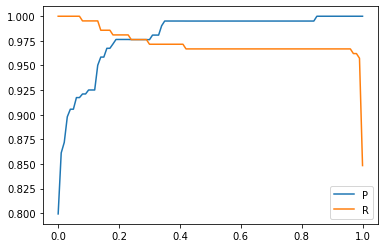

In [89]:
plt.plot(data_scores.threshold, data_scores.p, label='P')
plt.plot(data_scores.threshold, data_scores.r, label='R')
plt.legend()
plt.show()

Answer:0.3

**Question 4**
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

    0.1
    0.4
    0.6
    0.7


In [90]:
data_scores['F1'] = (2*data_scores.r* data_scores.p)/ (data_scores.p + data_scores.r)
data_scores.head()

,threshold,tp,fp,fn,tn,tpr,fpr,p,r,auc,F1
0,0.00,211,53,0,0,1.0,1.000000,0.799242,1.0,0.994992,0.888421
1,0.01,211,34,0,19,1.0,0.641509,0.861224,1.0,0.994992,0.925439
2,0.02,211,31,0,22,1.0,0.584906,0.871901,1.0,0.994992,0.931567
3,0.03,211,24,0,29,1.0,0.452830,0.897872,1.0,0.994992,0.946188
4,0.04,211,22,0,31,1.0,0.415094,0.905579,1.0,0.994992,0.950450


In [91]:
f1_max=data_scores['F1'].max()
data_scores[data_scores.F1==f1_max]


,threshold,tp,fp,fn,tn,tpr,fpr,p,r,auc,F1
35,0.35,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.994992,0.983213
36,0.36,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.994992,0.983213
37,0.37,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.994992,0.983213
38,0.38,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.994992,0.983213
39,0.39,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.994992,0.983213
40,0.40,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.994992,0.983213
41,0.41,205,1,6,52,0.971564,0.018868,0.995146,0.971564,0.994992,0.983213


In [92]:
Answer:0.4

**Question 5**
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

    Iterate over different folds of df_full_train
    Split the data into train and validation
    Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

    0.003
    0.014
    0.09
    0.24


In [93]:
def train(data_train, y_train, C=1.0):
    dicts = data_train[categorical+numerical_feature].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [94]:
dv, model = train(data_train, y_train, C=1)

In [95]:
def predict(data, dv, model):
    dicts = data[categorical+numerical_feature].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [96]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2)

scores = []

for train_idx, val_idx in kfold.split(data_full_train):
    data_train = data_full_train.iloc[train_idx]
    data_val = data_full_train.iloc[val_idx]

    y_train = data_train.card.values
    y_val = data_val.card.values
    dv, model = train(data_train, y_train,C=1)
    y_pred = predict(data_val, dv, model)
    

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print(f'{np.mean(scores):.3f} +- {np.std(scores):.3f}')


0.995 +- 0.003


**Question 6**
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]
Initialize KFold with the same parameters as previously
Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

    0.01
    0.1
    1
    10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [97]:
!pip install tqdm

In [98]:
from tqdm.auto import tqdm

In [99]:
n_splits = 5

for C in tqdm([0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scoress = []

    for train_idx, val_idx in kfold.split(data_full_train):
        data_train = data_full_train.iloc[train_idx]
        data_val = data_full_train.iloc[val_idx]

        y_train = data_train.card.values
        y_val = data_val.card.values
        dv, model = train(data_train, y_train,C=C)
        y_pred = predict(data_val, dv, model)
    

        auc = roc_auc_score(y_val, y_pred)
        scoress.append(auc)
    print('C=%s %.3f +- %.3f' % (C, np.mean(scoress), np.std(scoress)))       

C=0.01 0.995 +- 0.004
C=0.1 0.997 +- 0.003
C=1 0.996 +- 0.003
C=10 0.997 +- 0.003



In [ ]:
Answer: C=0.1